**Imports, Data Loading, Preprocessing**

In [1]:
import lib.basic_measurement as basic
import json
import lib.plot as plot
import matplotlib.pyplot as plt
import os

In [2]:
# Working directory
dataset_dir = "public1000/"

# Data Source
db_path = dataset_dir + "combined-pairs/"
# File suffix filter
pattern_suffix = "-orderc"

In [3]:
bms = []
LIMIT = 10
# Walk database directory 
for root, dirs, files in os.walk(db_path):
  
  if len(bms) >= LIMIT:
    break

  for file in files:
    
    if len(bms) >= LIMIT:
      break
    
    # Skip files that are not of the pattern we want
    if not file.endswith(pattern_suffix): 
      continue
    fn = os.path.join(root, file)

    with open(fn, 'r') as f: # open nameserver file

      # Read, parse, filter data 
      data = [basic.BasicMeasurement(json.loads(l)) for l in f if l != "\n"]
      data = [d for d in data if d.cs_flatten()]
      if len(data) == 0:
        continue
      
      bms.extend(data)



In [4]:
# Preprocess data
#data = [d for d in data if d.is_online() and d.has_logentries() and d.num_status("NOERROR") > 0]
#data = [d for d in data if d.cs_flatten()]
data = [d for d in data if d.cs_flatten()]
print(len(data))

73


**Flatten and Latency Comparison**

<Axes: title={'center': 'Response Latency for 83.173.203.174-46.140.228.158'}>

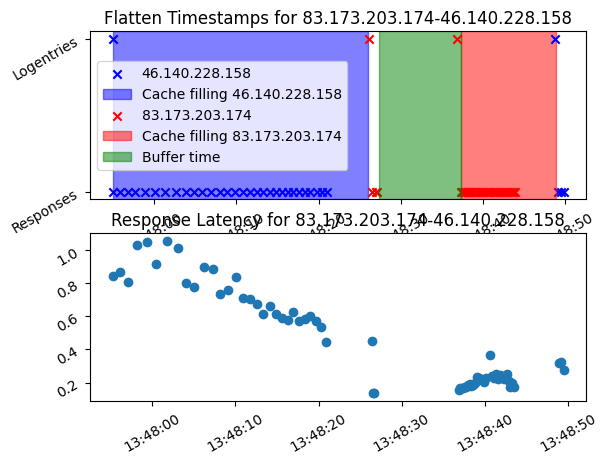

In [20]:
d = data[56]

fix, ax = plt.subplots(ncols=1, nrows=2)
plot.subplot_flatten_timing(d, ax[0])
plot.subplot_response_latency(d, ax[1])

#fix, ax = plt.subplots(ncols=1, nrows=1)
#plot.subplot_flatten_timing(d, ax)
#fix, ax = plt.subplots(ncols=1, nrows=1)
#plot.subplot_response_latency(d, ax)

**Multiple Flattening Plots**

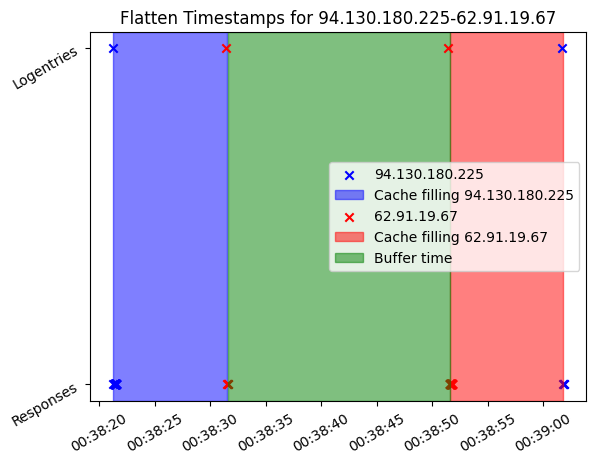

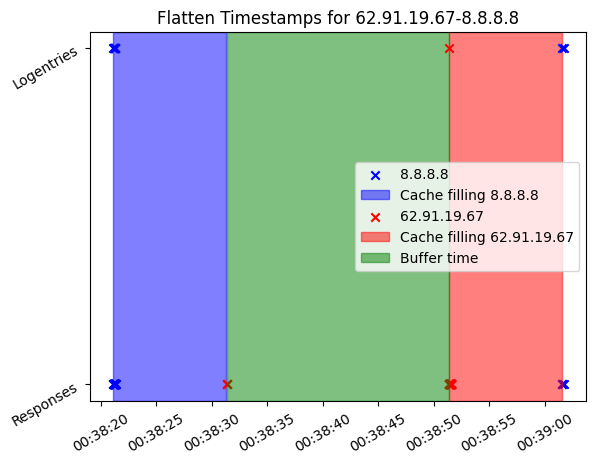

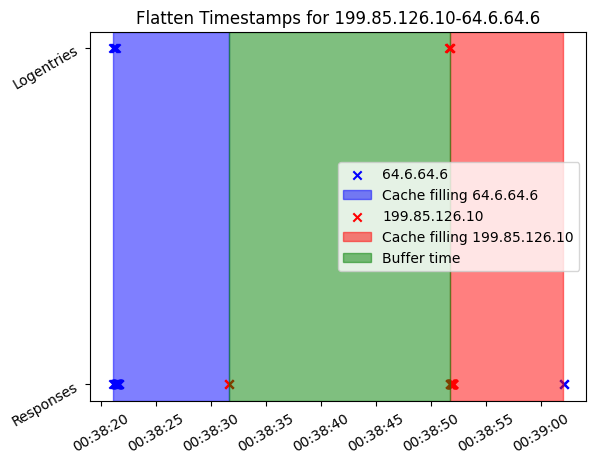

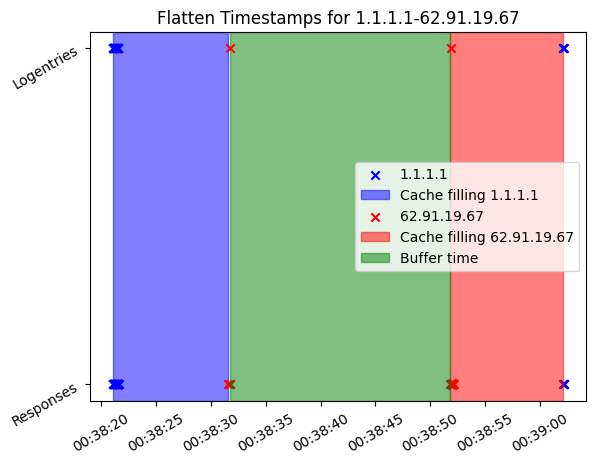

In [17]:
plot_data = data[0:4]

#plot.plot_subplot(plot_data, plot.subplot_flatten_timing, sub_x=2, sub_y=3)
for d in plot_data:
  fig, ax = plt.subplots(ncols=1, nrows=1)
  plot.subplot_flatten_timing(d, ax)
  #plot.subplot_response_latency(d, ax)